                                               Optimization
                                            Lab 1. Exercise 3
                                          Alexandre Escolà Nixon

3.The exercise

$f(x_{1},x_{2})=x_{1}^2(4-2.1x_{1}^2+\frac{1}{3}x_{1}^4)+x_{1}x_{2}+x_{2}^2(-4+4x_{2}^2)$

1.Plot the previous function within the range $x_{1}$ $\epsilon$ $[-2, 2]$ and $x_{2}$ $\epsilon$ $[-1, 1]$
using, for instance, a step of e.g. 0:1.

Populating the interactive namespace from numpy and matplotlib


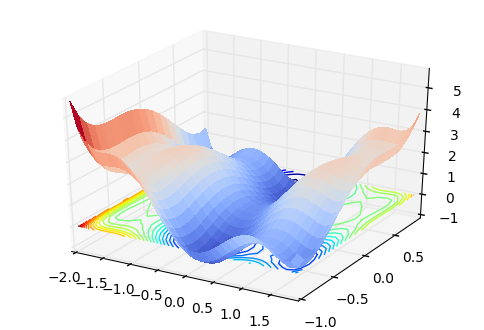

In [7]:
%pylab inline
import matplotlib.pyplot as plt
# This is general
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (X**2)*(4-2.1*(X**2)+(1.0/3)*X**4) + X*Y+(Y**2)*(-4+4*Y**2)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.contour(X,Y,Z,30,zdir='z',offset=0)

plt.show()

2.Analytically compute the gradient and plot  $\left| \left| \nabla f(x) \right| \right|^2$ within the
previous range. You are recommended to perform a contour plot within
the previous range. Observe where the minimum (and maximum) may be.

Firstly the gradient of the function is computed, were the following value is obtained:

\begin{equation}
\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_{1}}\\ \frac{\partial f}{\partial x_{2}} \end{bmatrix}
= \begin{bmatrix} 2x_{1}^{5}-8.4x_{1}^{3}+8x_{1}+x_{2} \\ 16x_{2}^{3}-8x_{2}+x_{1} \end{bmatrix}
\end{equation}

And the following expression is used to plot the result:

\begin{equation}
\left| \left| \nabla f(x) \right| \right|^2= \left( \frac{\partial f}{\partial x_{1}}\right)^2+\left( \frac{\partial f}{\partial x_{2}}\right)^2
\end{equation}

Populating the interactive namespace from numpy and matplotlib


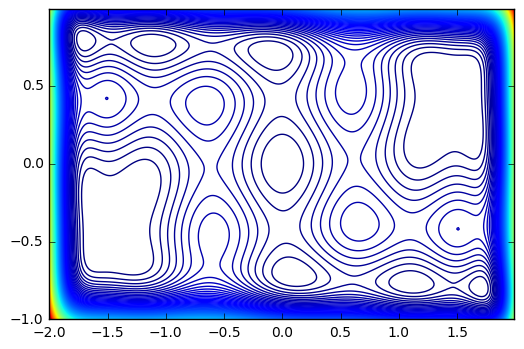

In [34]:
import matplotlib.pyplot as plt
# This is general
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-2, 2, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = (X**2)*(4-2.1*(X**2)+(1.0/3)*X**4) + (X*Y)+(Y**2)*(-4+4*Y**2)
dfzx=2*(X**5)-8.4*(X**3)+(8*X)+Y
dfzy=16*(Y**3)-(8*Y)+X
df=(dfzx**2)+(dfzy**2)

fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_surface(X, Y, df, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.contour(X,Y,df,150)#,zdir='z',offset=0)

plt.show()

3.Numerically compute an approximation of the points $x^{*}$ at which $\nabla f(x^{*}) = 0$.

The following code performes a search through each of the points of the squared norm of the gradient function and checks if they are strictly smaller than the 4 sorrouding points. If so, the value of the function and coordinates are stored for further analysis.

In [51]:
min_fx=[]
pos_mini=[]
pos_minj=[]
for i in range(1,len(df)-1):
    for j in range(1,len(df.T)-1):
        if (df[i][j] < df[i][j-1]) and (df[i][j] < df[i][j+1]) and (df[i][j] < df[i-1][j]) and (df[i][j] < df[i+1][j]):
            min_fx.append(df[i][j])
            pos_mini.append(i)
            pos_minj.append(j)            
posi=np.asarray(map(float,pos_mini))*2/len(X)-1 #rescaling of the vectors according to the original function ranges
posj=np.asarray(map(float,pos_minj))*2/len(X)-2 #rescaling of the vectors according to the original function ranges
print "The values of x2 where the gradient is smaller than the neighbors are: %r." %posi
print ""
print "And the values of x1 where the gradient is smaller than the neighbors are according to the previous x2 points are: %r." %posj
print ""
print "The values of the squared norm of the gradient are: %r" %min_fx


The values of x2 where the gradient is smaller than the neighbors are: array([-0.8 , -0.77, -0.71, -0.6 , -0.57, -0.23, -0.16,  0.  ,  0.16,
        0.23,  0.57,  0.6 ,  0.71,  0.77,  0.8 ]).

And the values of x1 where the gradient is smaller than the neighbors are according to the previous x2 points are: array([ 1.7 ,  1.11,  0.09, -1.3 , -1.61, -1.64, -1.23,  0.  ,  1.23,
        1.64,  1.61,  1.3 , -0.09, -1.11, -1.7 ]).

The values of the squared norm of the gradient are: [0.013656643599989939, 0.0012559284739343502, 0.0019007619514494491, 0.0027735236000001732, 0.0010452643597861273, 0.00067458253056473794, 0.00024181811612503876, 2.5637979419682884e-28, 0.00024181811612480997, 0.00067458253056705965, 0.0010452643597888738, 0.0027735235999994429, 0.0019007619514463986, 0.0012559284739367003, 0.013656643600008098]


4.Analytically compute the Hessian of $f(x1, x2)$ and evaluate it at the values x and y you have found. What kind of information is giving you the Hessian?
Does it correspond to a minimum? To a maximum? To neither of both?

\begin{equation}
H=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_{1}^2} & \frac{\partial f}{\partial x_{1} \partial x_{2}} \\ 
\frac{\partial f}{\partial x_{2} \partial x_{1}} & \frac{\partial^2 f}{\partial x_{2}^2}
\end{bmatrix}
=
\begin{bmatrix}
10x_{1}^{4}-25.2x_{1}^2+8 & 1\\ 
1 & 48x_{2}^2-8
\end{bmatrix}
\end{equation}

A Hessian is a square matrix of second order partial derivatives of a function. It will give us the curvature of the of a function of many variables.

Given that the Hessian matrix of a convex function is positive semi-definite we can test if a critical point is a local maximum, a minimum or a saddle point.

We can conclude that the point is a local minimum if the determinant of the Hessian is greater than zero and the second derivative respect to x1 is also greater than zero.

Where the determinant is: $D(x1,x2)=det(H(x_{1},x_{2}))=f_{x_{1}x_{1}}(a,b)f_{x_{2}x_{2}}(a,b)-f_{x_{1}x_{2}}(a,b)^2$

This is, considering a,b as the coordinates of the critical point:

+ $D(a,b)>0$ and $f_{x_{1}x_{1}}>0$, then (a,b) is a local minimum

And we can say it is a local maximum if the determinant of the Hessian is greater than zero and the second derivative respect to $x_{1}$ is lesser than zero

+ $D(a,b)>0$ and $f_{x_{1}x_{1}}<0$, then (a,b) is a local maximum
 
 otherwise:
 
+ $D(a,b)<0$ , then (a,b) is a saddle point (when the slopes become zero but there's not an extrema on both axes)


In [64]:
from numpy import linalg as LA
res=[]
#This function returns the Hessian matrix for given X1 and X2 values (here as X,Y)
def hessian(X,Y):
    dfxx=10*(X**4)-25.2*(X**2)+8
    dfyy=(48*Y**2)-8
    dfxy=1
    dfyx=1
    h=np.array([[dfxx, dfxy], [dfyx, dfyy]])
    return reshape(h,[1,4])
print "We obtain the following Hessians evaluated at the critical points. Continuously the two previously mentioned conditions are reviewed."
print "Finally below each Hessian, the nature of each critical point is confirmed, as its coordinates in the original function."
print ""
space='  '
for i in range(len(min_fx)):
    res=hessian(posj[i],posi[i])
    w,v=LA.eig(reshape(res,[2,2]))
    tmp=(reshape(res,[2,2]))
    print "   HESSIAN"
    print np.matrix.round(tmp,2), space,
    print "det(H(x1,x2))=",
    print res[0][0]*res[0][3]-1, space,
    print "f_x1x1(a,b)= ", 
    print res[0][0]
    print ""
    if (res[0][0]*res[0][3]-1)>0 and res[0][0]>0:
        print "MINIMUM at (%.2f,%.2f)" % (posj[i], posi[i])
    elif (res[0][0]*res[0][3]-1)>0 and res[0][0]<0:
        print "MAXIMUM at (%.2f,%.2f)" % (posj[i], posi[i])
    else:
        print "SADDLE POINT at (%.2f,%.2f)" % (posj[i], posi[i])
    print ""
    print ""
print "As it can be seen, there are 6 local minimas and 2 local maximas"

We obtain the following Hessians evaluated at the critical points. Continuously the two previously mentioned conditions are reviewed.
Finally below each Hessian, the nature of each critical point is confirmed, as its coordinates in the original function.

   HESSIAN
[[ 18.69   1.  ]
 [  1.    22.72]]    det(H(x1,x2))= 423.70496    f_x1x1(a,b)=  18.693

MINIMUM at (1.70,-0.80)


   HESSIAN
[[ -7.87   1.  ]
 [  1.    20.46]]    det(H(x1,x2))= -161.977402741    f_x1x1(a,b)=  -7.8682159

SADDLE POINT at (1.11,-0.77)


   HESSIAN
[[  7.8   1. ]
 [  1.   16.2]]    det(H(x1,x2))= 125.278935904    f_x1x1(a,b)=  7.7965361

MINIMUM at (0.09,-0.71)


   HESSIAN
[[-6.03  1.  ]
 [ 1.    9.28]]    det(H(x1,x2))= -56.93056    f_x1x1(a,b)=  -6.027

SADDLE POINT at (-1.30,-0.60)


   HESSIAN
[[ 9.87  1.  ]
 [ 1.    7.6 ]]    det(H(x1,x2))= 73.9563004203    f_x1x1(a,b)=  9.8689041

MINIMUM at (-1.61,-0.57)


   HESSIAN
[[ 12.56   1.  ]
 [  1.    -5.46]]    det(H(x1,x2))= -69.5961755853    f_x1x1(a,b)=  